In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
schools = pd.read_csv('datasets/dades.csv', sep=';', encoding='latin1')

# Ensure the 'classe' column values match the keys in the dictionary
schools['classe'] = schools['classe'].str.strip()

school_city_mapping = {
    "Institut Torre Vicens Lleida 2n ESO  Classe1": "Lleida",
    "Col·legi Santissima Trinitat Badalona Badalona 2n ESO  Classe2": "Badalona",
    
    "Institut Priorat Falset 1r ESO A Classe3": "Falset",
    "Institut Priorat Falset 1r ESO B Classe4": "Falset",
    "Institut Priorat Falset 1r ESO C Classe5": "Falset",
    "Institut Priorat Falset 2n ESO C Classe8": "Falset",
    "Institut Priorat Falset 2n ESO B Classe7": "Falset",
    "Institut Priorat Falset 2n ESO A Classe6": "Falset",

    "Escola Mercè Rodoreda Barcelona 3r primària B Classe10": "Barcelona",
    "Escola Mercè Rodoreda Barcelona 5è primària A Classe11": "Barcelona",
    "Escola Mercè Rodoreda Barcelona 3r primària A Classe9": "Barcelona",
    "Escola Mercè Rodoreda Barcelona 5è primària B Classe12": "Barcelona",

    "Institut Palamós Palamós CAI B  Classe14": "Palamós",
    "Institut Palamós Palamós CAI A  Classe13": "Palamós",
    "Institut Palamós Palamós CAI C  Classe15": "Palamós",
    "Institut Palamós Palamós CAI DE  Classe16": "Palamós",
    "Institut Palamós Palamós FIP1  Classe17": "Palamós",

}

city_region_mapping = {
    "Lleida": "Lleida",
    "Barcelona": "Barcelona Ciutat",
    "Badalona": "Metropolitana Nord",
    "Palamós": "Girona",
    "Falset": "Terres de l\'Ebre",
}

schools['ciutat'] = schools['classe'].map(school_city_mapping)
schools['regio_sanitaria'] = schools['ciutat'].map(city_region_mapping)

schools['timestamp'] = pd.to_datetime(schools['timestamp'], format='%d/%m/%Y')


schools.head()

,timestamp,num_alumnes,mal_de_panxa,calfreds,mal_de_cap,mal_de_coll,mocs,nas_tapat,esternut,vomits,altres,be,regular,malament,tos,classe,ciutat,regio_sanitaria
0,2024-02-09,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Institut Torre Vicens Lleida 2n ESO Classe1,Lleida,Lleida
1,2024-02-10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Institut Torre Vicens Lleida 2n ESO Classe1,Lleida,Lleida
2,2024-02-11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Institut Torre Vicens Lleida 2n ESO Classe1,Lleida,Lleida
3,2024-02-12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Institut Torre Vicens Lleida 2n ESO Classe1,Lleida,Lleida
4,2024-02-13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Institut Torre Vicens Lleida 2n ESO Classe1,Lleida,Lleida


In [4]:
print(schools['timestamp'].min())
print(schools['timestamp'].max())
schools.loc[schools['num_alumnes'] > 50].head()

2024-02-09 00:00:00
2024-06-17 00:00:00


,timestamp,num_alumnes,mal_de_panxa,calfreds,mal_de_cap,mal_de_coll,mocs,nas_tapat,esternut,vomits,altres,be,regular,malament,tos,classe,ciutat
70,2024-02-20,810,1,1,3,8,2,3,0,0,1,270,270,270,0,Col·legi Santissima Trinitat Badalona Badalona...,Badalona
72,2024-02-22,1236,0,0,0,2,1,2,3,0,2,1171,54,11,0,Col·legi Santissima Trinitat Badalona Badalona...,Badalona
73,2024-02-23,354,0,0,0,2,2,1,2,0,3,118,118,118,0,Col·legi Santissima Trinitat Badalona Badalona...,Badalona
74,2024-02-26,165,0,0,1,1,4,1,2,0,2,158,3,4,0,Col·legi Santissima Trinitat Badalona Badalona...,Badalona
75,2024-02-27,126,1,1,0,1,0,1,1,0,1,122,3,1,0,Col·legi Santissima Trinitat Badalona Badalona...,Badalona


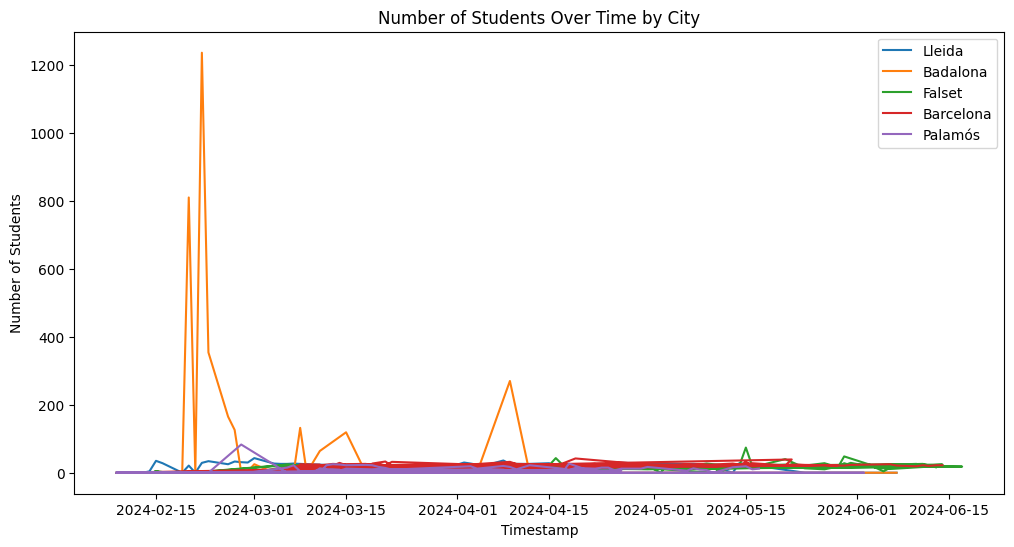

In [9]:
# Plotting
plt.figure(figsize=(12, 6))
for city in schools['ciutat'].unique():
    city_data = schools[schools['ciutat'] == city]
    plt.plot(city_data['timestamp'], city_data['num_alumnes'], label=city)

plt.xlabel('Timestamp')
plt.ylabel('Number of Students')
plt.title('Number of Students Over Time by City')
plt.legend()
plt.show()

In [9]:
df = pd.read_csv('datasets/DadesAtencioPrimaria.csv', sep=';')
df['data'] = pd.to_datetime(df['data'], format='%Y-%m-%d').dt.strftime('%d/%m/%Y')

df.head()

,data,setmana_epidemiologica,any,codi_regio,nom_regio,codi_ambit,nom_ambit,codi_abs,nom_abs,diagnostic,sexe,grup_edat,index_socioeconomic,casos,poblacio
0,01/10/2024,40,2024,61,Lleida,61,Lleida,329,Lleida rural - 2 Sud,Altres IRA,Dona,75 a 79,3,1,170
1,01/10/2024,40,2024,64,Girona,64,Girona,267,Vilafant,Altres IRA,Home,3 i 4,3,1,130
2,01/10/2024,40,2024,67,Catalunya Central,67,Catalunya Central,146,Manresa - 2,Bronquiolitis,Dona,0,3,1,82
3,01/10/2024,40,2024,75,Barcelona Metropolitana Sud,75,Barcelona Metropolitana Sud,203,Sant Boi de Llobregat - 2,Altres IRA,Home,0,3,1,62
4,01/10/2024,40,2024,75,Barcelona Metropolitana Sud,75,Barcelona Metropolitana Sud,295,L'Hospitalet de Llobregat - 08 Florida Sud,Faringoamigdalitis,Dona,5 a 9,4,2,546


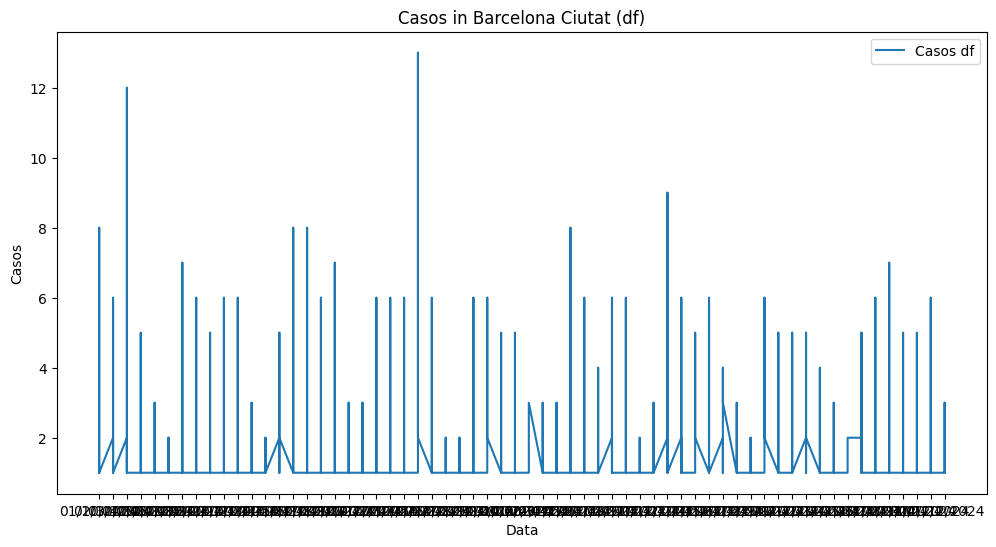

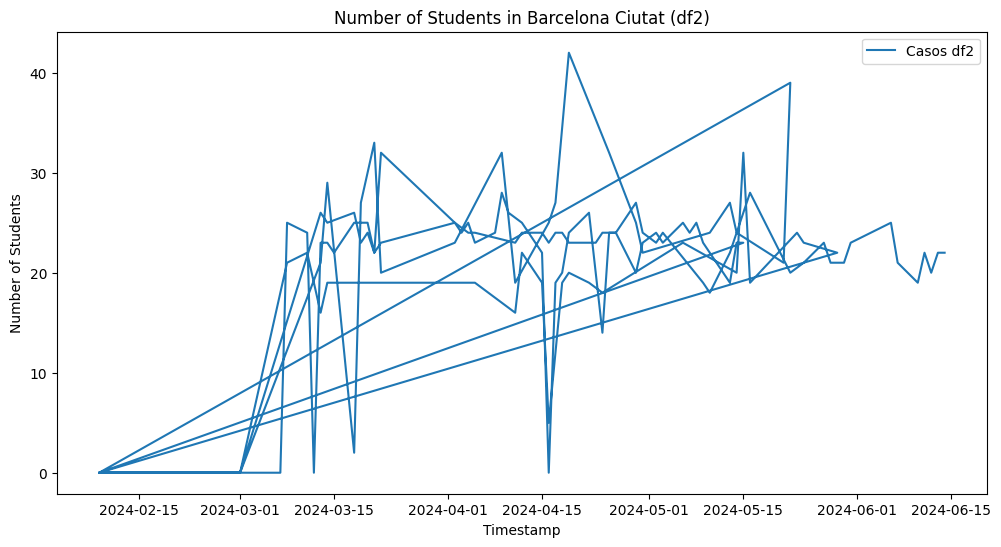

In [13]:
# plot casos de df where regio sanitaria = Barcelona Ciutat
# plot casos df2 where regio sanitaria = Barcelona Ciutat
# Filter data for 'Barcelona Ciutat' in both dataframes
df_barcelona = df[df['nom_regio'] == 'Barcelona Ciutat']
df2_barcelona = df2[df2['regio_sanitaria'] == 'Barcelona Ciutat']

# Plot for df
plt.figure(figsize=(12, 6))
plt.plot(df_barcelona['data'], df_barcelona['casos'], label='Casos df')
plt.xlabel('Data')
plt.ylabel('Casos')
plt.title('Casos in Barcelona Ciutat (df)')
plt.legend()
plt.show()

# Plot for df2
plt.figure(figsize=(12, 6))
plt.plot(df2_barcelona['timestamp'], df2_barcelona['num_alumnes'], label='Casos df2')
plt.xlabel('Timestamp')
plt.ylabel('Number of Students')
plt.title('Number of Students in Barcelona Ciutat (df2)')
plt.legend()
plt.show()